### Task 2 
- Load the Intel Image dataset  
- Train and test the dataset 
- Create a model using CNN  
- Evaluate the model using confusion matrix.

In [1]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

2026-01-06 15:44:10.584353: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-06 15:44:10.592822: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767694450.606663  192584 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767694450.610799  192584 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767694450.620009  192584 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
dir = 'Data/Intel Image Data/seg_train/seg_train'
train = image_dataset_from_directory(
        dir,
        image_size=(150, 150),
        batch_size=32,
        subset = "training",
        validation_split=0.2,
        seed=42,
)
       
                            

Found 14034 files belonging to 6 classes.
Using 11228 files for training.


I0000 00:00:1767694452.375605  192584 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9791 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


In [3]:
train.as_numpy_iterator().next()[0].shape

(32, 150, 150, 3)

In [4]:
train.as_numpy_iterator().next()[0].shape[0]

32

In [5]:
val = image_dataset_from_directory(
        'Data/Intel Image Data/seg_test/seg_test',
        image_size=(150, 150),
        batch_size=32,
        subset = "validation",
        validation_split=0.2,
        seed=42
)

Found 3000 files belonging to 6 classes.
Using 600 files for validation.


In [6]:
class_names = train.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [7]:
import tensorflow as tf
AUTOTUNE = tf.data.AUTOTUNE
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])
train = train.map(lambda x, y: (data_augmentation(x, training=True), y)).prefetch(AUTOTUNE)
val = val.prefetch(AUTOTUNE)

In [8]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


2026-01-06 15:44:13.183111: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: CANCELLED: RecvAsync is cancelled.
	 [[{{node GroupCrossDeviceControlEdges_0/NoOp/_21}}]] [type.googleapis.com/tensorflow.DerivedStatus='']
2026-01-06 15:44:13.183169: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: CANCELLED: RecvAsync is cancelled.
	 [[{{node GroupCrossDeviceControlEdges_0/NoOp/_21}}]]
	 [[GroupCrossDeviceControlEdges_0/NoOp/_20]] [type.googleapis.com/tensorflow.DerivedStatus='']


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling

In [10]:
model = Sequential([
    Rescaling(1./255, input_shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dense(128, activation='relu'),
    Flatten(),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/.conda/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train, validation_data=val, epochs=10,)

Epoch 1/10


I0000 00:00:1767694454.011222  192925 service.cc:152] XLA service 0x73f358009660 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767694454.011254  192925 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 SUPER, Compute Capability 8.9
2026-01-06 15:44:14.024145: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1767694454.099434  192925 cuda_dnn.cc:529] Loaded cuDNN version 91701
2026-01-06 15:44:14.838585: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot', 256 bytes spill stores, 256 bytes spill loads

2026-01-06 15:44:14.957308: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot', 

  5/351 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.2624 - loss: 1.8556

I0000 00:00:1767694457.014611  192925 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


350/351 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5411 - loss: 1.1942

2026-01-06 15:44:34.178632: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot', 568 bytes spill stores, 476 bytes spill loads

2026-01-06 15:44:34.218802: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot', 244 bytes spill stores, 244 bytes spill loads

2026-01-06 15:44:34.229612: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot', 256 bytes spill stores, 256 bytes spill loads

2026-01-06 15:44:34.555812: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot', 256 bytes spill stores, 256 bytes spill loads

2026-01-06 15:44:34.635761: I external/local_xla/xla

351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5413 - loss: 1.1937

2026-01-06 15:44:36.517198: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_72', 4 bytes spill stores, 4 bytes spill loads

2026-01-06 15:44:36.630863: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_72', 68 bytes spill stores, 68 bytes spill loads

2026-01-06 15:44:36.768215: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_72', 3884 bytes spill stores, 3836 bytes spill loads

2026-01-06 15:44:36.780207: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_72', 3628 bytes spill stores, 3604 bytes spill loads

2026-01-06 15:44:37.956331: I external/loc

351/351 ━━━━━━━━━━━━━━━━━━━━ 25s 62ms/step - accuracy: 0.5415 - loss: 1.1933 - val_accuracy: 0.6100 - val_loss: 1.1427
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.6818 - loss: 0.8630 - val_accuracy: 0.7117 - val_loss: 0.8516
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.7000 - loss: 0.7886 - val_accuracy: 0.7400 - val_loss: 0.7684
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.7390 - loss: 0.7052 - val_accuracy: 0.7567 - val_loss: 0.6923
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.7547 - loss: 0.6715 - val_accuracy: 0.7350 - val_loss: 0.8189
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.7645 - loss: 0.6507 - val_accuracy: 0.7783 - val_loss: 0.6588
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.7801 - loss: 0.6226 - val_accuracy: 0.7867 - val_loss: 0.6245
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.7881 - loss: 0.5983 - val_accurac

In [13]:
preds = model.predict(val)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


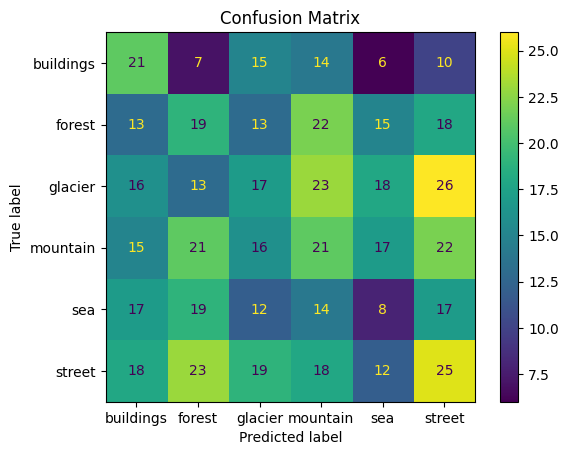

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

true_labels = np.concatenate([y for x, y in val], axis=0)

predicted_labels = np.argmax(preds, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(
)
plt.title('Confusion Matrix')
plt.show()

2026-01-06 15:47:10.260931: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


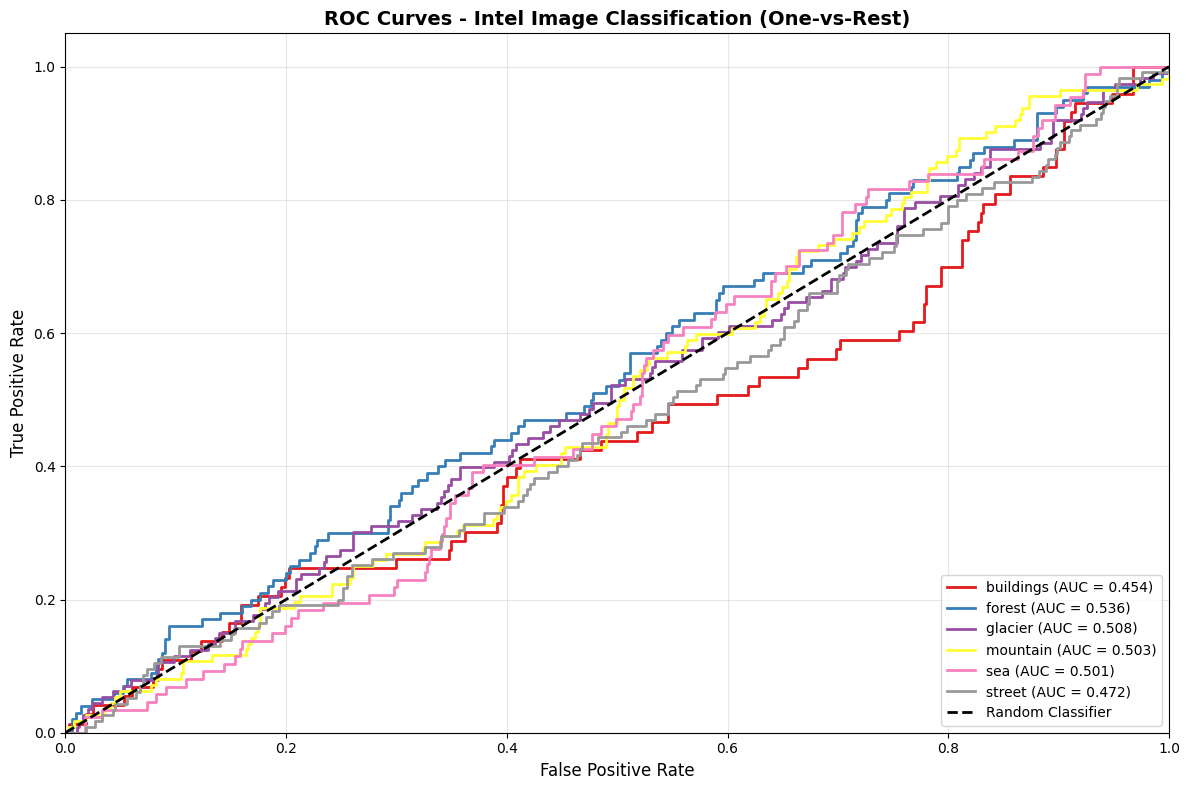


ROC AUC Scores per Class:
  buildings: 0.4542
  forest: 0.5362
  glacier: 0.5084
  mountain: 0.5026
  sea: 0.5011
  street: 0.4716

Macro-average AUC: 0.4957
Weighted-average AUC: 0.4973


In [15]:

# Plot ROC AUC Curves for Multi-class Classification (One-vs-Rest)
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Get probability predictions
y_true = np.concatenate([y for x, y in val], axis=0)
y_pred_proba = preds

# Number of classes
n_classes = len(class_names)

# Binarize the output for multi-class ROC AUC
y_bin = label_binarize(y_true, classes=list(range(n_classes)))

# Compute ROC curve and AUC for each class (One-vs-Rest)
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
colors = plt.cm.Set1(np.linspace(0, 1, n_classes))

plt.figure(figsize=(12, 8))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_proba[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, 
             label=f'{class_names[i]} (AUC = {roc_auc_dict[i]:.3f})')

# Plot random classifier baseline
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Intel Image Classification (One-vs-Rest)', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and display macro-average AUC
macro_auc = np.mean(list(roc_auc_dict.values()))
print(f"\nROC AUC Scores per Class:")
for i in range(n_classes):
    print(f"  {class_names[i]}: {roc_auc_dict[i]:.4f}")
print(f"\nMacro-average AUC: {macro_auc:.4f}")

# Calculate weighted average AUC
weights = np.bincount(y_true) / len(y_true)
weighted_auc = np.average([roc_auc_dict[i] for i in range(n_classes)], weights=weights)
print(f"Weighted-average AUC: {weighted_auc:.4f}")
